# Problem description
Take daily latent and sensible oaflux at a midlatitude, subtropics and tropical ocean location, respectively, and plot the value against the corresponding daily SST and surface air-temperature difference, $T_o-T_a$, in a scatter plot, so that you can examine the extent to which $Q_n=LE + SH = \lambda (T_o-T_a)$ is valid. Perform a linear regression analysis to find the damping coefficient $\lambda$.

# Python code
I use Python to read data and make graphs.

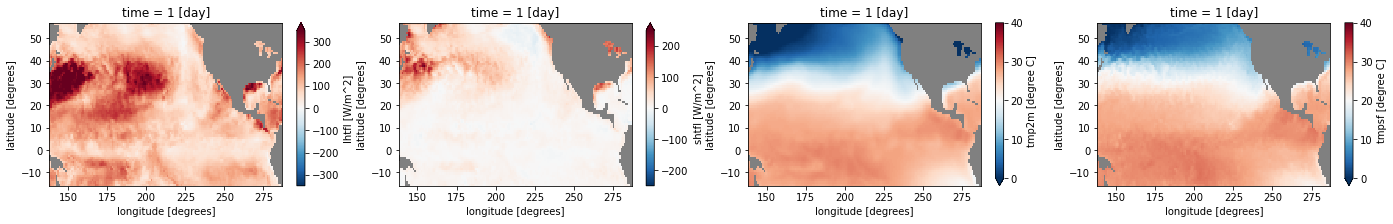

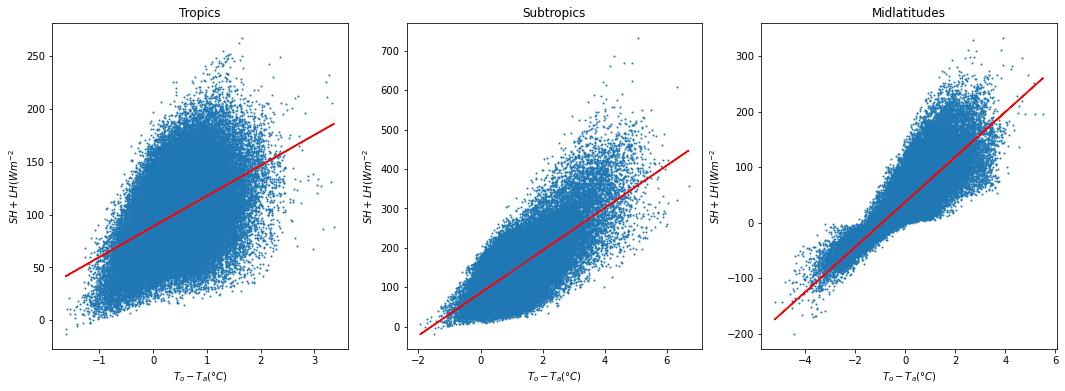

In [33]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# Load the data from the netCDF file
lh_ds = xr.open_dataset("lh_oaflux_2016.nc")
sh_ds = xr.open_dataset("sh_oaflux_2016.nc")
ta_ds = xr.open_dataset("ta_oaflux_2016.nc")
ts_ds = xr.open_dataset("ts_oaflux_2016.nc")
lh_da = lh_ds["lhtfl"]
sh_da = sh_ds["shtfl"]
ta_da = ta_ds["tmp2m"]
ts_da = ts_ds["tmpsf"]
# plot the first day map to check if the data are read correctly, set nan value to grey
f1, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 3))
cm = plt.get_cmap("RdBu_r").copy()
cm.set_bad(color="grey")
lh_da[0].plot(ax=ax1, cmap=cm, vmin=-350, vmax=350)
sh_da[0].plot(ax=ax2, cmap=cm, vmin=-250, vmax=250)
ta_da[0].plot(ax=ax3, cmap=cm, vmin=0, vmax=40)
ts_da[0].plot(ax=ax4, cmap=cm, vmin=0, vmax=40)
# select data in the tropics, subtropics and midlatitudes, respectively
tropics_lats, tropics_lons = slice(0, 5), slice(175, 225)
subtropics_lats, subtropics_lons = slice(23, 28), slice(175, 225)
midlatitudes_lats, midlatitudes_lons = slice(45, 50), slice(175, 225)
def select_data(das, lats, lons):
    return (da.sel(lat=lats, lon=lons) for da in das)
lh_tropics, sh_tropics, ta_tropics, ts_tropics = select_data((lh_da, sh_da, ta_da, ts_da), tropics_lats, tropics_lons)
lh_subtropics, sh_subtropics, ta_subtropics, ts_subtropics = select_data((lh_da, sh_da, ta_da, ts_da), subtropics_lats, subtropics_lons)
lh_midlatitudes, sh_midlatitudes, ta_midlatitudes, ts_midlatitudes = select_data((lh_da, sh_da, ta_da, ts_da), midlatitudes_lats, midlatitudes_lons)
# get x (ts-ta) and y (sh+lh) data for each region
x_tropics = (ts_tropics.data - ta_tropics.data).flatten()
y_tropics = (sh_tropics.data + lh_tropics.data).flatten()
x_subtropics = (ts_subtropics.data - ta_subtropics.data).flatten()
y_subtropics = (sh_subtropics.data + lh_subtropics.data).flatten()
x_midlatitudes = (ts_midlatitudes.data - ta_midlatitudes.data).flatten()
y_midlatitudes = (sh_midlatitudes.data + lh_midlatitudes.data).flatten()
# perform linear regression, result includes slope, intercept, r_value, p_value, std_err, intercept_stderr
result_tropics = stats.linregress(x_tropics, y_tropics)
result_subtropics = stats.linregress(x_subtropics, y_subtropics)
result_midlatitudes = stats.linregress(x_midlatitudes, y_midlatitudes)
# make a scatter plot for each region and add linear regression line
f2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
ax1.scatter(x_tropics, y_tropics, s=1)
ax1.plot(x_tropics, result_tropics[0] * x_tropics + result_tropics[1], color="red")
ax1.set_title("Tropics")
ax2.scatter(x_subtropics, y_subtropics, s=1)
ax2.plot(x_subtropics, result_subtropics[0] * x_subtropics + result_subtropics[1], color="red")
ax2.set_title("Subtropics")
ax3.scatter(x_midlatitudes, y_midlatitudes, s=1)
ax3.plot(x_midlatitudes, result_midlatitudes[0] * x_midlatitudes + result_midlatitudes[1], color="red")
ax3.set_title("Midlatitudes")
for ax in (ax1, ax2, ax3):
    ax.set_xlabel("$T_o-T_a (\degree C)$")
    ax.set_ylabel("$SH+LH (Wm^{-2}$")

In [34]:
# print the regression results, keep 2 decimal places
print("Tropics: slope = %.2f, intercept = %.2f, r_value = %.2f, p_value = %.2f, std_err = %.2f" % (result_tropics[0], result_tropics[1], result_tropics[2], result_tropics[3], result_tropics[4]))
print("Subtropics: slope = %.2f, intercept = %.2f, r_value = %.2f, p_value = %.2f, std_err = %.2f" % (result_subtropics[0], result_subtropics[1], result_subtropics[2], result_subtropics[3], result_subtropics[4]))
print("Midlatitudes: slope = %.2f, intercept = %.2f, r_value = %.2f, p_value = %.2f, std_err = %.2f" % (result_midlatitudes[0], result_midlatitudes[1], result_midlatitudes[2], result_midlatitudes[3], result_midlatitudes[4]))

Tropics: slope = 28.88, intercept = 88.63, r_value = 0.46, p_value = 0.00, std_err = 0.19
Subtropics: slope = 53.86, intercept = 85.34, r_value = 0.72, p_value = 0.00, std_err = 0.17
Midlatitudes: slope = 40.56, intercept = 37.25, r_value = 0.85, p_value = 0.00, std_err = 0.08


# Analysis
The linear regression graphs are plotted above and the regression results are also printed. It shows that the damping coefficient $\lambda$ is $28.88 Wm^{-2}K^{-1}$ at tropics, $53.86 Wm^{-2}K^{-1}$ at subtropics and $40.55 Wm^{-2}K^{-1}$ at midlatitudes. The damping coefficient is largest in the subtropics and smallest in the tropics. $Q_n=LE + SH = \lambda (T_o-T_a)$ is most valid in the midlatitudes (with largest $r$ value and smallest intercept) and least valid in the tropics (with smallest $r$ value and largest interpt).